AttributeError: module 'matplotlib' has no attribute 'axes'

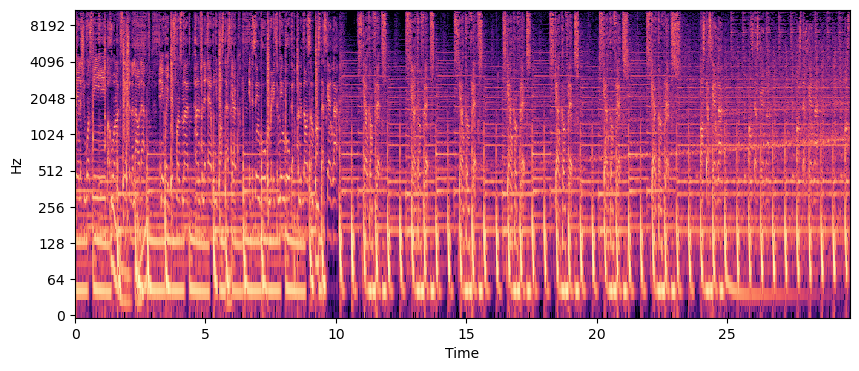

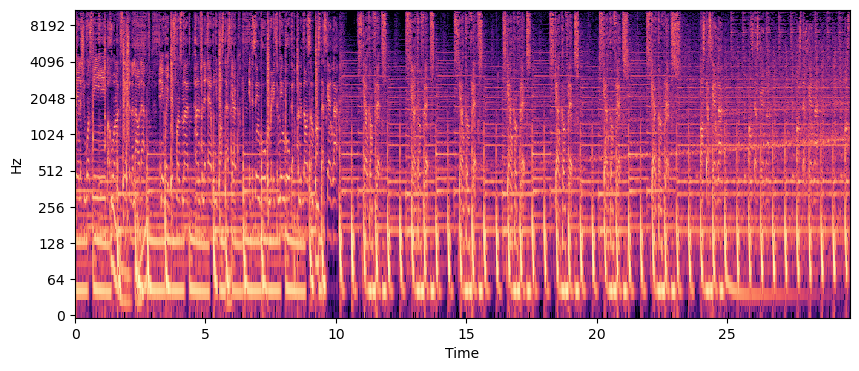

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [4]:
import os
import requests
import torch
import torchaudio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Replace this with the name of your DataFrame
csv_file = "danceable_tracks-1.csv"
danceable_tracks = pd.read_csv(csv_file)

# Create a folder with the same name as the DataFrame
folder_name = "danceable_tracks"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Iterate through the DataFrame
for index, row in danceable_tracks.iterrows():
    track_id = row['track_id']
    preview_url = row['preview_url']

    # Download the preview audio
    response = requests.get(preview_url)

    # Save the audio file temporarily
    with open("temp_audio.mp3", "wb") as file:
        file.write(response.content)

    # Load the audio file using torchaudio
    waveform, sample_rate = torchaudio.load("temp_audio.mp3")

    # Generate a spectrogram
    specgram = torchaudio.transforms.Spectrogram()(waveform)

    # Convert the spectrogram to dB scale
    specgram_db = torchaudio.transforms.AmplitudeToDB()(specgram)

    # Plot the spectrogram and save it as an image
    plt.figure(figsize=(10, 4))
    plt.imshow(specgram_db.log2()[0, :, :].numpy(), cmap='gray', aspect='auto', origin='lower')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram for track_id {track_id}')
    plt.savefig(f"{folder_name}/{track_id}.png")
    plt.close()

# Delete the temporary audio file
os.remove("temp_audio.mp3")


In [ ]:
!conda install -c conda-forge librosa --yes

In [2]:
!pip install pandas

  Using cached pandas-1.5.3-cp310-cp310-macosx_10_9_x86_64.whl (12.0 MB)
  Using cached pytz-2022.7.1-py2.py3-none-any.whl (499 kB)
